In [1]:
from google.colab import files
uploaded = files.upload()

Saving appearances.csv to appearances (2).csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving games.csv to games (2).csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving leagues.csv to leagues (2).csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving players.csv to players (2).csv


In [5]:
from google.colab import files
uploaded = files.upload()

Saving shots.csv to shots (2).csv


In [6]:
from google.colab import files
uploaded = files.upload()

Saving teamstats.csv to teamstats (2).csv


In [1]:
import pandas as pd, re, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
import re
import nltk; nltk.download('stopwords'); from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dfAppereances=pd.read_csv("appearances.csv")

In [3]:
dfGames=pd.read_csv("games.csv")

In [4]:
dfLeagues=pd.read_csv("leagues.csv")

In [5]:
dfShots=pd.read_csv("shots.csv")

In [6]:
dfStats=pd.read_csv("teamstats.csv")

In [7]:
dfPlayers = pd.read_csv("players.csv", encoding='latin-1')

In [8]:
dfAppereances.head()

,gameID,playerID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,position,positionOrder,yellowCard,redCard,time,substituteIn,substituteOut,leagueID
0,81,560,0,0,0,0.0,0.000000,0.000000,0,0,0.000000,GK,1,0,0,90,0,0,1
1,81,557,0,0,0,0.0,0.106513,0.106513,0,1,0.106513,DR,2,0,0,82,222605,0,1
2,81,548,0,0,0,0.0,0.127738,0.127738,0,0,0.000000,DC,3,0,0,90,0,0,1
3,81,628,0,0,0,0.0,0.106513,0.106513,0,0,0.000000,DC,3,0,0,90,0,0,1
4,81,1006,0,0,0,0.0,0.021225,0.021225,0,0,0.000000,DL,4,0,0,90,0,0,1


In [9]:
dfAppereances.isnull().sum()

,0
gameID,0
playerID,0
goals,0
ownGoals,0
shots,0
xGoals,0
xGoalsChain,0
xGoalsBuildup,0
assists,0
keyPasses,0


In [10]:
dfGames.head()

,gameID,leagueID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,homeProbability,drawProbability,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,81,1,2015,2015-08-08 15:45:00,89,82,1,0,0.2843,0.3999,...,5.90,1.62,3.6,6.00,1.67,4.00,5.75,1.64,4.07,6.04
1,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0.3574,0.3500,...,4.27,1.91,3.5,4.00,2.00,3.50,4.20,1.82,3.88,4.70
2,83,1,2015,2015-08-08 18:00:00,72,90,2,2,0.2988,0.4337,...,5.62,1.73,3.5,5.00,1.73,3.90,5.40,1.75,3.76,5.44
3,84,1,2015,2015-08-08 18:00:00,75,77,4,2,0.6422,0.2057,...,4.34,2.00,3.1,2.70,2.00,3.40,4.33,1.79,3.74,5.10
4,85,1,2015,2015-08-08 18:00:00,79,78,1,3,0.1461,0.2159,...,3.08,2.60,3.1,2.88,2.60,3.25,3.00,2.46,3.39,3.14


In [11]:
dfGames.isnull().sum()

,0
gameID,0
leagueID,0
season,0
date,0
homeTeamID,0
awayTeamID,0
homeGoals,0
awayGoals,0
homeProbability,0
drawProbability,0


In [12]:
dfLeagues.head()

,leagueID,name,understatNotation
0,1,Premier League,EPL
1,2,Serie A,Serie_A
2,3,Bundesliga,Bundesliga
3,4,La Liga,La_liga
4,5,Ligue 1,Ligue_1


In [13]:
dfLeagues.isnull().sum()

,0
leagueID,0
name,0
understatNotation,0


In [14]:
dfShots.head()

,gameID,shooterID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY
0,81,554,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421
1,81,555,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627
2,81,554,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333
3,81,554,NaN,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533
4,81,555,654.0,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707


In [15]:
dfShots.isnull().sum()

,0
gameID,0
shooterID,0
assisterID,84344
minute,0
situation,0
lastAction,36896
shotType,0
shotResult,0
xGoal,0
positionX,0


In [16]:
dfStats.head()

,gameID,teamID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,81,89,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,13.8261,12,1,2.0,0,W
1,81,82,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,8.2188,12,2,3.0,0,L
2,82,73,2015,2015-08-08 18:00:00,h,0,0.876106,11,2,11,6.9000,13,6,3.0,0,L
3,82,71,2015,2015-08-08 18:00:00,a,1,0.782253,7,3,2,11.8462,13,3,4.0,0,W
4,83,72,2015,2015-08-08 18:00:00,h,2,0.604226,10,5,5,6.6500,7,8,1.0,0,D


In [17]:
dfStats.isnull().sum()

,0
gameID,0
teamID,0
season,0
date,0
location,0
goals,0
xGoals,0
shots,0
shotsOnTarget,0
deep,0


In [18]:
dfPlayers.head()

,playerID,name
0,560,Sergio Romero
1,557,Matteo Darmian
2,548,Daley Blind
3,628,Chris Smalling
4,1006,Luke Shaw


In [19]:
dfPlayers.isnull().sum()

,0
playerID,0
name,0


In [20]:
df_resultados = pd.merge(dfLeagues, dfGames, on='leagueID', how='inner')
df_resultados

,leagueID,name,understatNotation,gameID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,1,Premier League,EPL,81,2015,2015-08-08 15:45:00,89,82,1,0,...,5.90,1.62,3.60,6.00,1.67,4.00,5.75,1.64,4.07,6.04
1,1,Premier League,EPL,82,2015,2015-08-08 18:00:00,73,71,0,1,...,4.27,1.91,3.50,4.00,2.00,3.50,4.20,1.82,3.88,4.70
2,1,Premier League,EPL,83,2015,2015-08-08 18:00:00,72,90,2,2,...,5.62,1.73,3.50,5.00,1.73,3.90,5.40,1.75,3.76,5.44
3,1,Premier League,EPL,84,2015,2015-08-08 18:00:00,75,77,4,2,...,4.34,2.00,3.10,2.70,2.00,3.40,4.33,1.79,3.74,5.10
4,1,Premier League,EPL,85,2015,2015-08-08 18:00:00,79,78,1,3,...,3.08,2.60,3.10,2.88,2.60,3.25,3.00,2.46,3.39,3.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,5,Ligue 1,Ligue_1,16131,2020,2021-05-23 19:00:00,168,166,1,2,...,6.20,1.50,4.50,6.00,1.50,4.33,6.00,1.58,4.36,6.18
12676,5,Ligue 1,Ligue_1,16132,2020,2021-05-23 19:00:00,177,176,1,2,...,3.32,2.50,2.90,3.20,2.40,3.10,3.00,2.66,3.28,2.93
12677,5,Ligue 1,Ligue_1,16133,2020,2021-05-23 19:00:00,163,235,2,0,...,9.41,1.32,5.25,9.00,1.30,5.25,9.00,1.23,6.85,12.59
12678,5,Ligue 1,Ligue_1,16134,2020,2021-05-23 19:00:00,175,181,0,1,...,10.67,1.29,5.25,11.00,1.29,5.25,9.50,1.29,5.97,10.80


In [21]:
df_tablacompleta = pd.merge(df_resultados, dfStats, on='gameID', how='inner')
df_tablacompleta

,leagueID,name,understatNotation,gameID,season_x,date_x,homeTeamID,awayTeamID,homeGoals,awayGoals,...,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,1,Premier League,EPL,81,2015,2015-08-08 15:45:00,89,82,1,0,...,0.627539,9,1,4,13.8261,12,1,2.0,0,W
1,1,Premier League,EPL,81,2015,2015-08-08 15:45:00,89,82,1,0,...,0.674600,9,4,10,8.2188,12,2,3.0,0,L
2,1,Premier League,EPL,82,2015,2015-08-08 18:00:00,73,71,0,1,...,0.876106,11,2,11,6.9000,13,6,3.0,0,L
3,1,Premier League,EPL,82,2015,2015-08-08 18:00:00,73,71,0,1,...,0.782253,7,3,2,11.8462,13,3,4.0,0,W
4,1,Premier League,EPL,83,2015,2015-08-08 18:00:00,72,90,2,2,...,0.604226,10,5,5,6.6500,7,8,1.0,0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25355,5,Ligue 1,Ligue_1,16133,2020,2021-05-23 19:00:00,163,235,2,0,...,0.357583,9,2,0,39.7273,10,3,0.0,0,L
25356,5,Ligue 1,Ligue_1,16134,2020,2021-05-23 19:00:00,175,181,0,1,...,1.460500,19,5,6,7.5600,13,9,1.0,0,L
25357,5,Ligue 1,Ligue_1,16134,2020,2021-05-23 19:00:00,175,181,0,1,...,1.380290,10,2,3,14.7200,10,3,0.0,0,W
25358,5,Ligue 1,Ligue_1,16135,2020,2021-05-23 19:00:00,225,179,1,1,...,0.323960,6,2,1,15.1000,17,2,1.0,0,D


In [22]:
df_tablacompletaa = pd.merge(df_tablacompleta, dfShots, on='gameID', how='inner')
df_tablacompletaa

,leagueID,name,understatNotation,gameID,season_x,date_x,homeTeamID,awayTeamID,homeGoals,awayGoals,...,shooterID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY
0,1,Premier League,EPL,81,2015,2015-08-08 15:45:00,89,82,1,0,...,554,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421
1,1,Premier League,EPL,81,2015,2015-08-08 15:45:00,89,82,1,0,...,555,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627
2,1,Premier League,EPL,81,2015,2015-08-08 15:45:00,89,82,1,0,...,554,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333
3,1,Premier League,EPL,81,2015,2015-08-08 15:45:00,89,82,1,0,...,554,NaN,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533
4,1,Premier League,EPL,81,2015,2015-08-08 15:45:00,89,82,1,0,...,555,654.0,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649081,5,Ligue 1,Ligue_1,16135,2020,2021-05-23 19:00:00,225,179,1,1,...,6615,8651.0,19,SetPiece,Aerial,Head,MissedShots,0.039172,0.899,0.511
649082,5,Ligue 1,Ligue_1,16135,2020,2021-05-23 19:00:00,225,179,1,1,...,6615,8651.0,54,SetPiece,Cross,LeftFoot,Goal,0.372809,0.902,0.482
649083,5,Ligue 1,Ligue_1,16135,2020,2021-05-23 19:00:00,225,179,1,1,...,3464,NaN,70,OpenPlay,NaN,LeftFoot,MissedShots,0.009242,0.738,0.774
649084,5,Ligue 1,Ligue_1,16135,2020,2021-05-23 19:00:00,225,179,1,1,...,8651,4882.0,72,OpenPlay,Cross,Head,BlockedShot,0.045374,0.882,0.543


In [23]:
df_jugadores = pd.merge(dfPlayers, dfAppereances, on='playerID', how='inner')
df_jugadores

,playerID,name,gameID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,position,positionOrder,yellowCard,redCard,time,substituteIn,substituteOut,leagueID
0,560,Sergio Romero,81,0,0,0,0.000000,0.000000,0.000000,0,0,0.000000,GK,1,0,0,90,0,0,1
1,560,Sergio Romero,91,0,0,0,0.000000,0.058938,0.058938,0,0,0.000000,GK,1,0,0,90,0,0,1
2,560,Sergio Romero,101,0,0,0,0.000000,0.014860,0.014860,0,0,0.000000,GK,1,0,0,90,0,0,1
3,560,Sergio Romero,120,0,0,0,0.000000,0.570477,0.570477,0,0,0.000000,GK,1,0,0,90,0,0,1
4,560,Sergio Romero,3412,0,0,0,0.000000,0.054445,0.054445,0,0,0.000000,GK,1,0,0,90,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356508,7396,Loic Bessile,16132,0,0,0,0.000000,0.251697,0.251697,0,0,0.000000,DC,3,0,0,90,0,0,5
356509,9566,Yanis Lhéry,16134,0,0,1,0.019131,0.019131,0.000000,0,0,0.000000,Sub,17,0,0,29,0,474027,5
356510,9565,Mathys Saban,16134,0,0,0,0.000000,0.000000,0.000000,0,0,0.000000,Sub,17,0,0,12,0,474032,5
356511,9568,Charles Costes,16134,0,0,0,0.000000,0.000000,0.000000,0,0,0.000000,Sub,17,0,0,1,0,474045,5


In [24]:
df3=df_jugadores.sort_values(['leagueID', 'goals'], ascending=[True, False])

In [42]:
df4=df3.groupby(['leagueID', 'name'])['goals'].sum().reset_index()

In [43]:
df4.sort_values(['leagueID', 'goals'], ascending=[True, False])

,leagueID,name,goals
513,1,Harry Kane,163
1235,1,Sergio Agüero,132
596,1,Jamie Vardy,118
991,1,Mohamed Salah,95
1195,1,Sadio Mané,95
...,...,...,...
7463,5,Yuto Nagatomo,0
7467,5,Zacharie Boucher,0
7468,5,Zakarie Labidi,0
7473,5,Zinédine Ould Khaled,0


<ipython-input-45-62869cfb9424>:13: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(x='name', y='goals', hue='leagueID', data=top_10_goleadores, dodge=False, palette=colors)


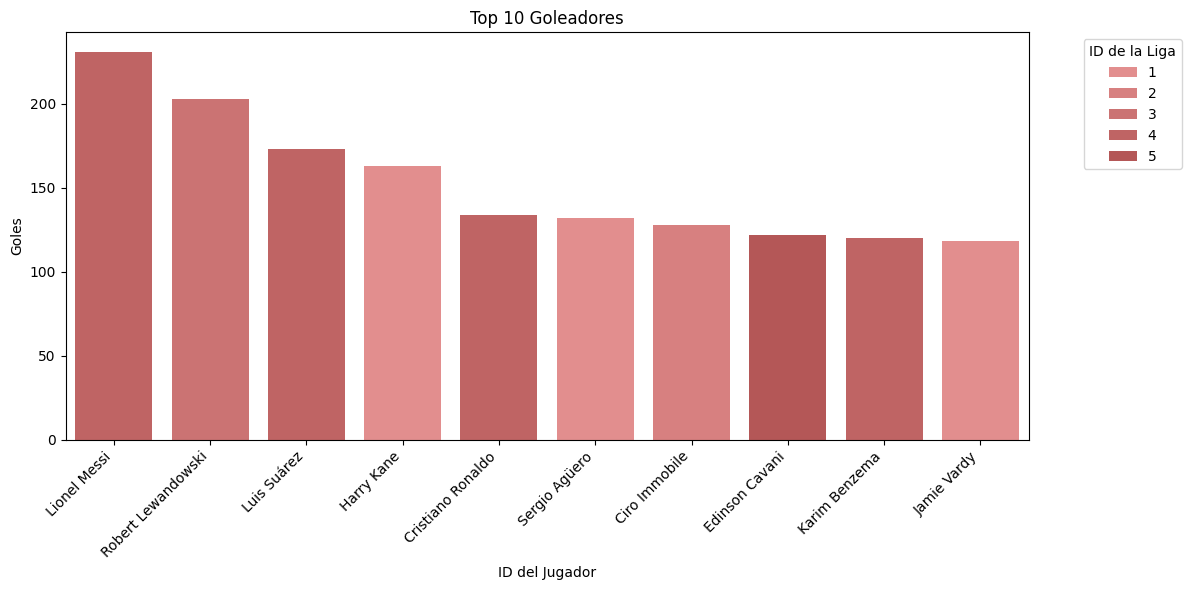

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

top_10_goleadores = df4.sort_values('goals', ascending=False).head(10)
# Create the colormap
cmap = mcolors.LinearSegmentedColormap.from_list('RedScale', ['lightcoral', 'darkred'])
# Get a list of colors from the colormap
colors = [cmap(i) for i in np.linspace(0, 1, 10)] # Assuming you want 10 colors

plt.figure(figsize=(12, 6))
# Use the 'palette' argument to apply the colormap to the bars
sns.barplot(x='name', y='goals', hue='leagueID', data=top_10_goleadores, dodge=False, palette=colors)
plt.xlabel('ID del Jugador')
plt.ylabel('Goles')
plt.title('Top 10 Goleadores')
plt.xticks(rotation=45, ha='right')
plt.legend(title='ID de la Liga', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

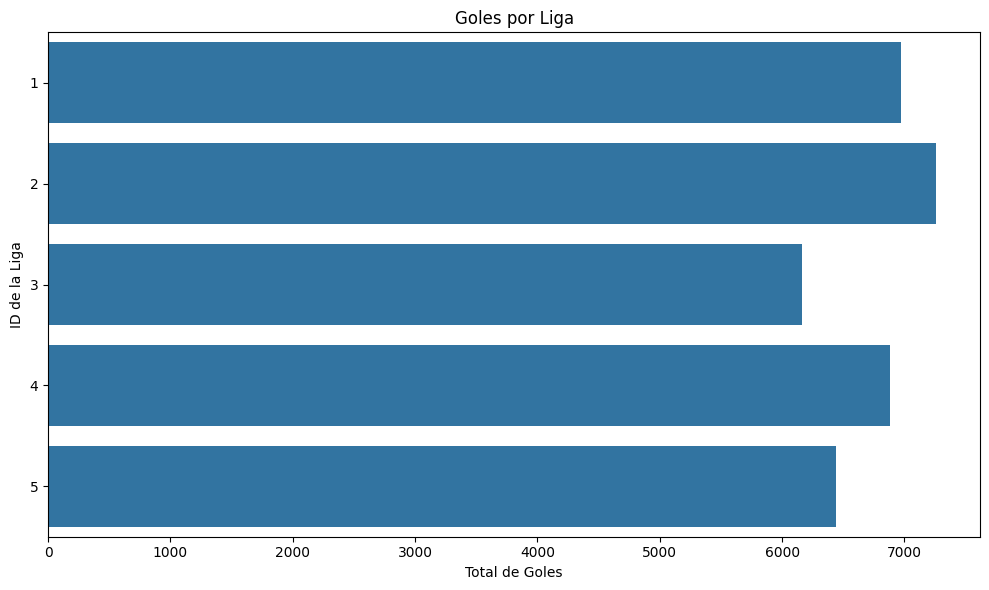

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


goles_por_liga = df_jugadores.groupby('leagueID')['goals'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='goals', y='leagueID', data=goles_por_liga, orient='h')
plt.xlabel('Total de Goles')
plt.ylabel('ID de la Liga')
plt.title('Goles por Liga')
plt.tight_layout()
plt.show()

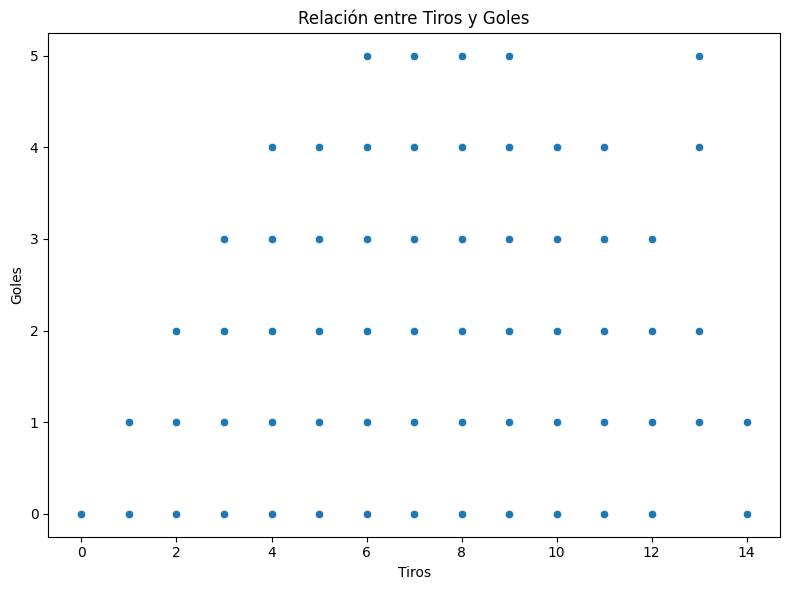

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatterplot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.scatterplot(x='shots', y='goals', data=df_jugadores)
plt.xlabel('Tiros')
plt.ylabel('Goles')
plt.title('Relación entre Tiros y Goles')
plt.tight_layout()
plt.show()

In [48]:
df5=df_jugadores.sort_values(['leagueID', 'shots'], ascending=[True, False])

In [49]:
df6=df5.groupby(['leagueID', 'name'])['shots'].sum().reset_index()

In [50]:
df6.sort_values(['leagueID', 'shots'], ascending=[True, False])

,leagueID,name,shots
513,1,Harry Kane,886
1235,1,Sergio Agüero,714
991,1,Mohamed Salah,540
596,1,Jamie Vardy,536
239,1,Christian Eriksen,535
...,...,...,...
7446,5,Younn Zahary,0
7451,5,Youssef Benali,0
7461,5,Yusuf Sari,0
7467,5,Zacharie Boucher,0


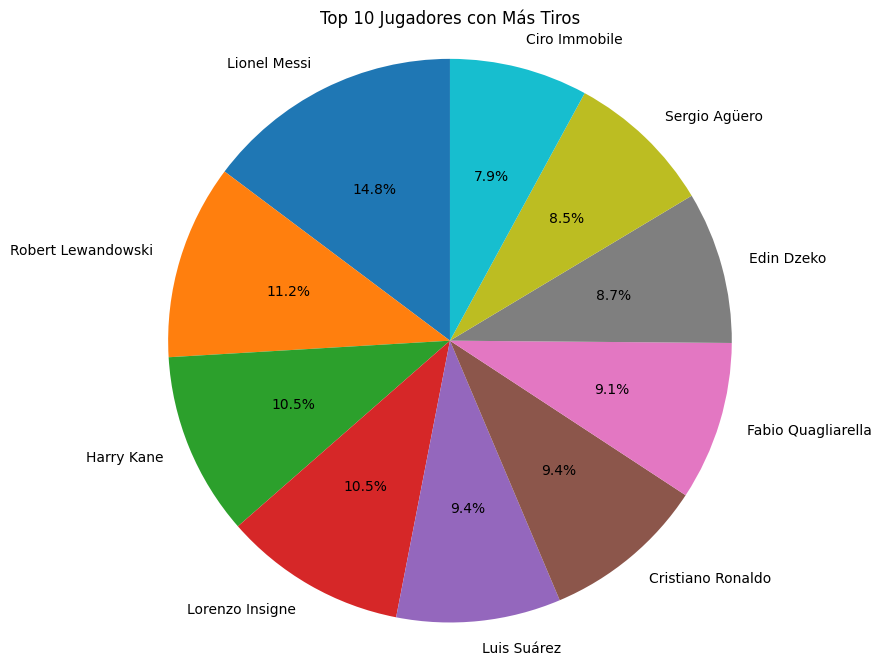

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the top 10 players with most shots
top_10_shooters = df6.sort_values('shots', ascending=False).head(10)

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(top_10_shooters['shots'], labels=top_10_shooters['name'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Jugadores con Más Tiros')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()